In [25]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read in data
incidents_SS = pd.read_csv('../../data/02-clean-data/SSDB/incident.csv')
incidents_MS = pd.read_csv("../../data/02-clean-data/MSDB/school_shooters.csv")

In [4]:
# Plot locations on map

In [12]:
# Plot shootings by year

<AxesSubplot:xlabel='School_Level', ylabel='Count'>

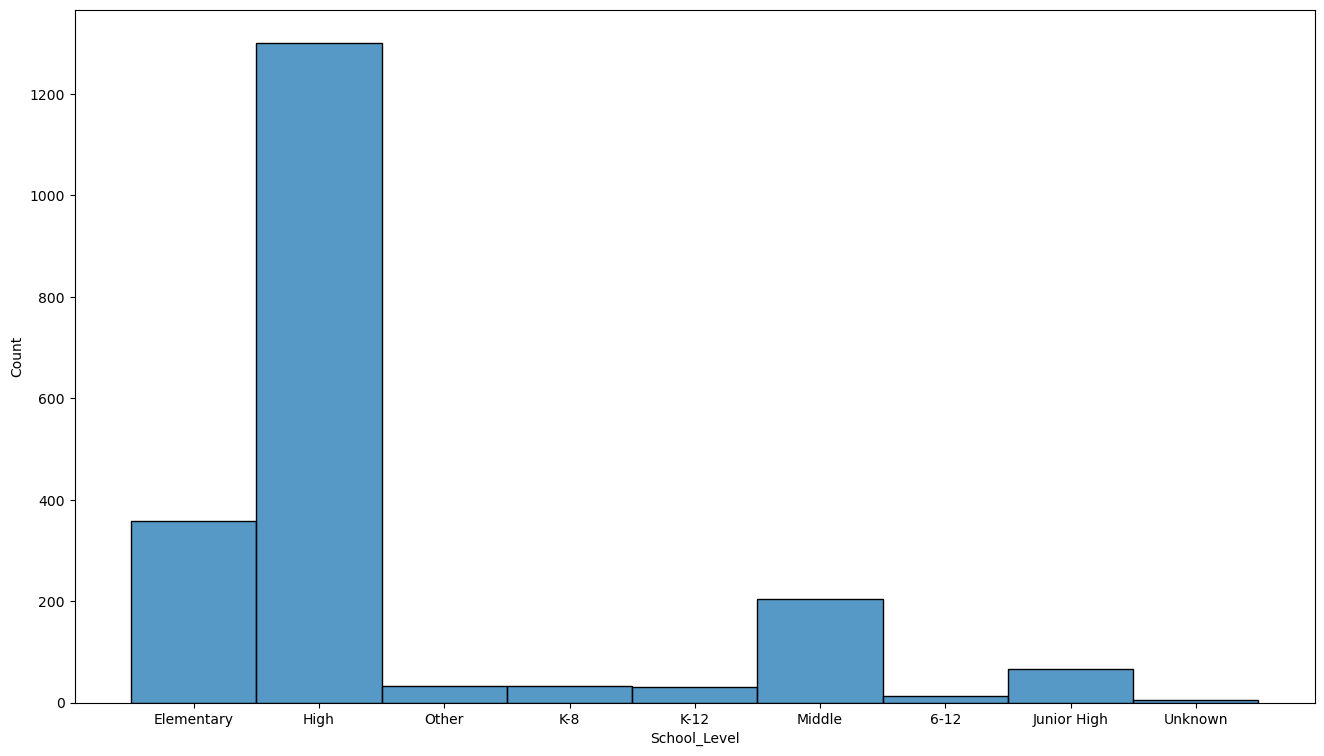

In [29]:
# Plot school level
sns.histplot(incidents_SS['School_Level'])

In [6]:
incidents_SS.columns

Index(['Incident_ID', 'Sources', 'Number_News', 'Media_Attention',
       'Reliability', 'Date', 'Quarter', 'School', 'City', 'State',
       'School_Level', 'Location', 'Location_Type', 'During_School',
       'Time_Period', 'First_Shot', 'Summary', 'Narrative', 'Situation',
       'Targets', 'Accomplice', 'Hostages', 'Barricade', 'Officer_Involved',
       'Bullied', 'Domestic_Violence', 'Gang_Related', 'Preplanned',
       'Shots_Fired', 'Active_Shooter_FBI'],
      dtype='object')

In [9]:
incidents_SS.head()

,Incident_ID,Sources,Number_News,Media_Attention,Reliability,Date,Quarter,School,City,State,...,Accomplice,Hostages,Barricade,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Preplanned,Shots_Fired,Active_Shooter_FBI
0,20220620ILGRC,https://www.cbsnews.com/chicago/news/woman-and...,50,National,4,2022-06-20,Summer,Gresham School of Excellence,Chicago,IL,...,No,No,No,No,No,No,NaN,No,100,No
1,20220613WAMAE,https://www.q13fox.com/news/deputies-arrest-15...,5,Local,4,2022-06-13,Summer,Mariner High School,Everett,WA,...,No,No,No,No,No,No,NaN,No,99,No
2,20220610ALBYB,https://www.actionnews5.com/2022/06/10/student...,3,Local,4,2022-06-10,Summer,Byhalia High School,Byhalia,MS,...,NaN,No,No,No,No,No,NaN,No,1,No
3,20220609ALWAG,https://www.live5news.com/2022/06/09/potential...,100,National,4,2022-06-09,Summer,Walnut Park Elementary School,Gadsden,AL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,20220608ARLIL,https://www.kark.com/crime/lrpd-school-bus-hit...,5,National,4,2022-06-08,Summer,Little Rock School District Bus,Little Rock,AR,...,NaN,No,No,No,No,No,NaN,No,99,No


In [23]:
incidents_SS[['Year', 'Month', 'Day']] = incidents_SS['Date'].str.split('-', expand=True)

In [28]:
plt.rcParams["figure.figsize"] = [16,9]

# sns.histplot(incidents_SS['Date'])